In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds,_=default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Mark').sheet1
data = worksheet.get_all_values()

In [ ]:
df=pd.DataFrame(data[1:],columns=data[0])
df= df.astype({'X':'int'})
df= df.astype({'Y':'int'})
df.head()

,X,Y
0,8,194
1,9,218
2,14,338
3,4,98
4,6,146


In [ ]:
x=df[['X']].values
y=df[['Y']].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)
Scaler=MinMaxScaler()

In [ ]:
Scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=Scaler.transform(x_train)

In [ ]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer ='rmsprop',loss='mse')

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 120827.8125
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 120812.5938
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 120801.2500
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 120791.6562
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 120783.0938
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 120775.2109
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 120767.7812
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 120760.7109
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 120753.9297
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 120747.3516
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 120740.9453
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 120734.6875
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 120728.5312
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 120722.4688
Epoch 15/500
1/1 

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)

<Axes: >

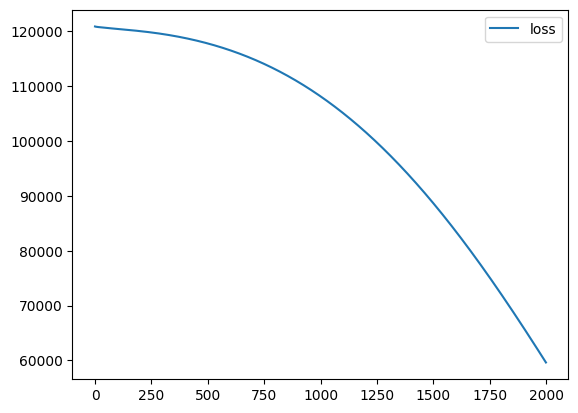

In [ ]:
loss_df.plot()

In [ ]:
x_test1=Scaler.transform(x_test)

In [ ]:
ai_brain.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 520928.9688


520928.96875

In [ ]:
x_n1=[[8]]

In [ ]:
x_n1_1=Scaler.transform(x_n1)

In [ ]:
ai_brain.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[7.8369646]], dtype=float32)